## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## ***************DATA SET IMPORTATION ***************

In [2]:
df_als=pd.read_csv('train-alsfrs.csv')
df_sensor=pd.read_csv('train-sensor.csv')
df_static=pd.read_csv('train-static.csv')

In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [4]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [5]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


# Feature Engineering

In [6]:
column_prefixes = {}
for col in df_sensor.columns:
    prefix = col.split('_')[0]
    if prefix not in column_prefixes:
        column_prefixes[prefix] = []
    column_prefixes[prefix].append(col)

# Extract lists of columns based on prefixes
beat_columns = column_prefixes.get('beat', [])
heartrate_columns = column_prefixes.get('heart', [])
respiration_columns = column_prefixes.get('respiration', [])
spo2_columns = column_prefixes.get('spo2', [])
steps_columns = column_prefixes.get('steps', [])

# Print the results
print("beat columns:", beat_columns)
print("heartrate columns:", heartrate_columns)
print("respiration columns:", respiration_columns)
print("spo2 columns:", spo2_columns)
print("steps columns:", steps_columns)


beat columns: ['beat_to_beat_AI', 'beat_to_beat_C2a', 'beat_to_beat_C2d', 'beat_to_beat_Ca', 'beat_to_beat_Cd', 'beat_to_beat_GI', 'beat_to_beat_HTI', 'beat_to_beat_IALS', 'beat_to_beat_PAS', 'beat_to_beat_PI', 'beat_to_beat_PIP', 'beat_to_beat_PSS', 'beat_to_beat_SD1a', 'beat_to_beat_SD1d', 'beat_to_beat_SDNNa', 'beat_to_beat_SDNNd', 'beat_to_beat_SI', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'beat_to_beat_cvi', 'beat_to_beat_cvsd', 'beat_to_beat_hcvNN', 'beat_to_beat_iqrNN', 'beat_to_beat_madNN', 'beat_to_beat_meanNN', 'beat_to_beat_medianNN', 'beat_to_beat_pNN20', 'beat_to_beat_pNN50', 'beat_to_beat_rmssd', 'beat_to_beat_sd1', 'beat_to_beat_sd1sd2', 'beat_to_beat_sd2', 'beat_to_beat_sdNN', 'beat_to_beat_sdNNI1', 'beat_to_beat_sdNNI2', 'beat_to_beat_sdNNI5', 'beat_to_beat_sdaNN1', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdsd']
heartrate columns: ['heart_rate_baseline', 'heart_rate_linear_trend', 'heart_rate_max_time', 'heart_rate_maximum', 'heart_rate_mean

In [7]:
# Compute aggregated features for beat_to_beat columns
df_sensor['beat_to_beat_mean'] = df_sensor[beat_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[beat_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[beat_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[beat_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[beat_columns].max(axis=1)

# Compute aggregated features for heart_rate columns
df_sensor['beat_to_beat_mean'] = df_sensor[heartrate_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[heartrate_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[heartrate_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[heartrate_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[heartrate_columns].max(axis=1)

# Compute aggregated features for respiration columns
df_sensor['beat_to_beat_mean'] = df_sensor[respiration_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[respiration_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[respiration_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[respiration_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[respiration_columns].max(axis=1)

# Compute aggregated features for spo2 columns
df_sensor['beat_to_beat_mean'] = df_sensor[spo2_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[spo2_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[spo2_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[spo2_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[spo2_columns].max(axis=1)

# Compute aggregated features for steps columns
df_sensor['beat_to_beat_mean'] = df_sensor[steps_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[steps_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[steps_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[steps_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[steps_columns].max(axis=1)

df_sensor = df_sensor.drop(columns=beat_columns + heartrate_columns + respiration_columns + spo2_columns+ steps_columns)

In [8]:
df_sensor

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max
0,fd228ba0,800,7.0,1631.0,1638.25,82.0,24.333333,23.0,25.026652,0.0,50.0
1,fd228ba0,801,6.0,1631.0,1637.25,147.0,49.000000,26.0,63.694584,0.0,121.0
2,fd228ba0,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,1665.25,121.0,26.666667,13.0,35.529331,0.0,67.0
4,fd228ba0,804,7.0,1631.0,1638.25,139.0,46.333333,28.0,57.726366,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,1815.25,264.0,74.666667,86.0,69.694572,0.0,138.0
13942,c0d49276,104,18.0,1731.0,1749.25,125.0,31.000000,11.0,44.508426,0.0,82.0
13943,c0d49276,105,153.0,1731.0,1884.25,249.0,73.333333,103.0,63.893140,0.0,117.0
13944,c0d49276,106,98.0,1731.0,1829.25,414.0,116.000000,68.0,146.041090,0.0,280.0


In [9]:
df_sensor.isnull().sum()

id                      0
days                    0
active_calories        62
basal_calories         62
total_calories         62
total_steps            62
beat_to_beat_mean      62
beat_to_beat_median    62
beat_to_beat_std       62
beat_to_beat_min       62
beat_to_beat_max       62
dtype: int64

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [10]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max
0,fd228ba0,800,7.0,1631.0,1638.25,82.0,24.333333,23.0,25.026652,0.0,50.0
1,fd228ba0,801,6.0,1631.0,1637.25,147.0,49.000000,26.0,63.694584,0.0,121.0
3,fd228ba0,803,34.0,1631.0,1665.25,121.0,26.666667,13.0,35.529331,0.0,67.0
4,fd228ba0,804,7.0,1631.0,1638.25,139.0,46.333333,28.0,57.726366,0.0,111.0
5,fd228ba0,805,0.0,1631.0,1631.25,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,1815.25,264.0,74.666667,86.0,69.694572,0.0,138.0
13942,c0d49276,104,18.0,1731.0,1749.25,125.0,31.000000,11.0,44.508426,0.0,82.0
13943,c0d49276,105,153.0,1731.0,1884.25,249.0,73.333333,103.0,63.893140,0.0,117.0
13944,c0d49276,106,98.0,1731.0,1829.25,414.0,116.000000,68.0,146.041090,0.0,280.0


In [11]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [12]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [13]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [14]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [15]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [16]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [17]:
df=df1

In [18]:
df.isnull().sum()

id                   0
sex                  0
diagnostic_delay     0
age_at_diagnosis     0
FVC                 37
weight               4
bmi                  4
days                 1
Q1                   1
Q2                   1
Q3                   1
Q4                   1
Q5                   1
Q6                   1
Q7                   1
Q8                   1
Q9                   1
Q10                  1
Q11                  1
Q12                  1
dtype: int64

In [19]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [20]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 1s 1ms/step - loss: 1.1196
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.9714
Epoch 3/100
300/300 [==============================] - 0s 860us/step - loss: 0.8894
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.8302
Epoch 5/100
300/300 [==============================] - 0s 896us/step - loss: 0.7724
Epoch 6/100
300/300 [==============================] - 0s 1ms/step - loss: 0.7129
Epoch 7/100
300/300 [==============================] - 0s 769us/step - loss: 0.6662
Epoch 8/100
300/300 [==============================] - 0s 834us/step - loss: 0.6326
Epoch 9/100
300/300 [==============================] - 0s 811us/step - loss: 0.6079
Epoch 10/100
300/300 [==============================] - 0s 802us/step - loss: 0.5883
Epoch 11/100
300/300 [==============================] - 0s 908us/step - loss: 0.5714
Epoch 12/100
300/300 [==============================] - 0s 924us/step - loss: 0.55

In [21]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,3.482908,60.318958,71.655869,55.682194,20.212511,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,3.482908,60.318958,71.655869,55.682194,20.212511,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,3.482908,60.318958,71.655869,55.682194,20.212511,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,3.482908,60.318958,71.655869,55.682194,20.212511,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,3.482908,60.318958,71.655869,55.682194,20.212511,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,1.395467,58.678127,81.435692,69.280296,23.974352,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,2.016899,55.516319,83.080101,75.915108,25.594967,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,2.016899,55.516319,83.080101,75.915108,25.594967,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,2.016899,55.516319,83.080101,75.915108,25.594967,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [22]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [23]:
merged_df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,800.0,7.0,1631.0,1638.25,82.0,24.333333,23.0,25.026652,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,801.0,6.0,1631.0,1637.25,147.0,49.000000,26.0,63.694584,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,803.0,34.0,1631.0,1665.25,121.0,26.666667,13.0,35.529331,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,804.0,7.0,1631.0,1638.25,139.0,46.333333,28.0,57.726366,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,805.0,0.0,1631.0,1631.25,0.0,0.000000,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,3a32ee9b,1328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
13927,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
13928,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
13929,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [24]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
23,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
57,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
135,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
168,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
201,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,3a32ee9b,1328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
13927,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
13928,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
13929,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [25]:
print(merged.columns.get_loc('Q1'))

17


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [26]:
x_data=merged.iloc[:,2:17]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
23,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,1.0,3.482908,60.318958,71.655869,55.682194,20.212511
57,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,1.0,3.482908,60.318958,71.655869,55.682194,20.212511
135,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,1.0,3.482908,60.318958,71.655869,55.682194,20.212511
168,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,1.0,3.482908,60.318958,71.655869,55.682194,20.212511
201,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,1.0,3.482908,60.318958,71.655869,55.682194,20.212511


In [27]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,17:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
23,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
57,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
135,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
168,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
201,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,3a32ee9b,1328.0,285.0,1646.0,1986.25,6956.0,1794.666667,1314.0,1715.211649,186.0,...,4.0,0.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
13927,df4c99f5,8762.0,259.0,1560.0,1903.25,3016.0,664.000000,856.0,534.849823,41.0,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
13928,c0d49276,135.0,112.0,1736.0,1848.25,3686.0,869.000000,1109.0,730.516484,41.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
13929,c0d49276,167.0,341.0,1736.0,2075.25,6369.0,1856.333333,1257.0,1938.022704,38.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [28]:
df=df.drop(['id'],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 23 to 13930
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   days                 299 non-null    float64
 1   active_calories      299 non-null    float64
 2   basal_calories       299 non-null    float64
 3   total_calories       299 non-null    float64
 4   total_steps          299 non-null    float64
 5   beat_to_beat_mean    299 non-null    float64
 6   beat_to_beat_median  299 non-null    float64
 7   beat_to_beat_std     299 non-null    float64
 8   beat_to_beat_min     299 non-null    float64
 9   beat_to_beat_max     299 non-null    float64
 10  sex                  299 non-null    float64
 11  diagnostic_delay     299 non-null    float32
 12  age_at_diagnosis     299 non-null    float32
 13  FVC                  299 non-null    float32
 14  weight               299 non-null    float32
 15  bmi                  299 non-null    

In [30]:
df.columns.get_loc('Q1')

16

In [31]:
# Summing the columns from index 10 to 19
df['total_Q'] = df.iloc[:, 16:28].sum(axis=1)


In [32]:
df

,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,total_Q
23,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,...,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0
57,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,...,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0
135,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,...,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,23.0
168,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,...,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,24.0
201,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,...,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,1328.0,285.0,1646.0,1986.25,6956.0,1794.666667,1314.0,1715.211649,186.0,3470.0,...,0.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,36.0
13927,8762.0,259.0,1560.0,1903.25,3016.0,664.000000,856.0,534.849823,41.0,1065.0,...,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0,24.0
13928,135.0,112.0,1736.0,1848.25,3686.0,869.000000,1109.0,730.516484,41.0,1485.0,...,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0
13929,167.0,341.0,1736.0,2075.25,6369.0,1856.333333,1257.0,1938.022704,38.0,3828.0,...,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0


In [33]:
bins = [0, 20, 30, 40, 48]
labels = ['Very bad', 'Bad', 'Fair', 'Good']
df['ALSFRS_Category'] = pd.cut(df['total_Q'], bins=bins, labels=labels, right=True)
df


,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,total_Q,ALSFRS_Category
23,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad
57,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad
135,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,...,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,23.0,Bad
168,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,...,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,24.0,Bad
201,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,...,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0,23.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,1328.0,285.0,1646.0,1986.25,6956.0,1794.666667,1314.0,1715.211649,186.0,3470.0,...,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,36.0,Fair
13927,8762.0,259.0,1560.0,1903.25,3016.0,664.000000,856.0,534.849823,41.0,1065.0,...,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0,24.0,Bad
13928,135.0,112.0,1736.0,1848.25,3686.0,869.000000,1109.0,730.516484,41.0,1485.0,...,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0,Fair
13929,167.0,341.0,1736.0,2075.25,6369.0,1856.333333,1257.0,1938.022704,38.0,3828.0,...,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0,Fair


<AxesSubplot:xlabel='ALSFRS_Category', ylabel='count'>

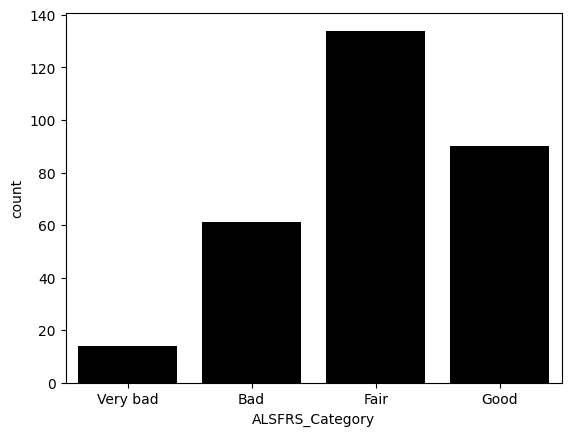

In [60]:
sns.countplot(data=df, x='ALSFRS_Category',color='black')


In [35]:
df['age_at_diagnosis'].describe()

count    299.000000
mean      57.101471
std        5.156487
min       34.818188
25%       54.357662
50%       57.402290
75%       59.840721
max       67.270844
Name: age_at_diagnosis, dtype: float64

In [36]:
df['weight'].describe()

count    299.000000
mean      73.685760
std       11.354858
min       45.589809
25%       68.120193
50%       73.662193
75%       80.055038
max      102.127533
Name: weight, dtype: float64

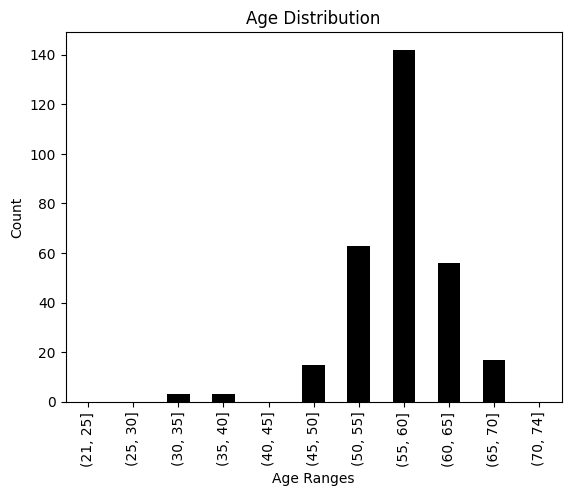

In [37]:
bins = [21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]
df['AgeGroup'] = pd.cut(df['age_at_diagnosis'], bins)
age_counts = df['AgeGroup'].value_counts().sort_index()
age_counts.plot(kind='bar', color='black')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,total_Q,ALSFRS_Category,AgeGroup
23,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,...,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]"
57,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,...,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]"
135,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,...,2.0,3.0,1.0,0.0,1.0,0.0,2.0,23.0,Bad,"(60, 65]"
168,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,...,2.0,3.0,1.0,0.0,1.0,0.0,2.0,24.0,Bad,"(60, 65]"
201,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,...,1.0,3.0,1.0,0.0,2.0,0.0,2.0,23.0,Bad,"(60, 65]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,165.0,304.0,1545.0,1864.25,3694.0,786.333333,873.0,607.874165,0.0,1228.0,...,0.0,0.0,0.0,0.0,2.0,2.0,3.0,14.0,Very bad,"(55, 60]"
13921,213.0,212.0,1631.0,1873.25,4589.0,1133.666667,1300.0,1371.962949,30.0,2521.0,...,0.0,1.0,1.0,0.0,4.0,4.0,2.0,28.0,Bad,"(50, 55]"
13922,224.0,196.0,1641.0,1867.25,5858.0,1609.000000,1783.0,1989.967588,0.0,3798.0,...,0.0,1.0,1.0,0.0,4.0,4.0,4.0,29.0,Bad,"(50, 55]"
13924,501.0,96.0,1480.0,1601.25,1477.0,171.666667,234.0,189.362967,0.0,266.0,...,1.0,2.0,1.0,1.0,2.0,4.0,4.0,28.0,Bad,"(55, 60]"


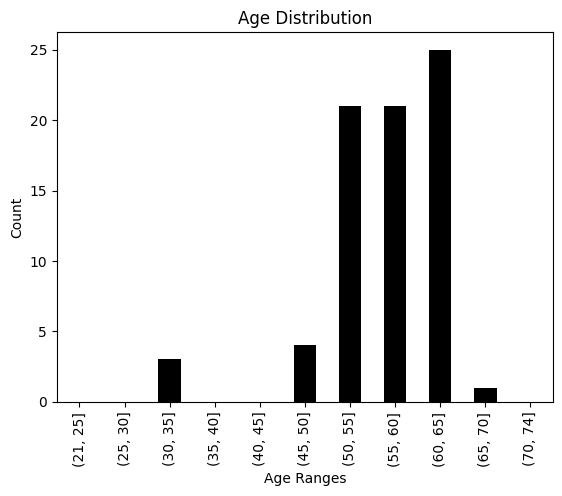

In [41]:
df

,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,total_Q,ALSFRS_Category,AgeGroup
23,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,...,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]"
57,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,...,2.0,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]"
135,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,...,2.0,3.0,1.0,0.0,1.0,0.0,2.0,23.0,Bad,"(60, 65]"
168,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,...,2.0,3.0,1.0,0.0,1.0,0.0,2.0,24.0,Bad,"(60, 65]"
201,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,...,1.0,3.0,1.0,0.0,2.0,0.0,2.0,23.0,Bad,"(60, 65]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,1328.0,285.0,1646.0,1986.25,6956.0,1794.666667,1314.0,1715.211649,186.0,3470.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,36.0,Fair,"(35, 40]"
13927,8762.0,259.0,1560.0,1903.25,3016.0,664.000000,856.0,534.849823,41.0,1065.0,...,0.0,0.0,2.0,0.0,2.0,3.0,4.0,24.0,Bad,"(45, 50]"
13928,135.0,112.0,1736.0,1848.25,3686.0,869.000000,1109.0,730.516484,41.0,1485.0,...,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0,Fair,"(55, 60]"
13929,167.0,341.0,1736.0,2075.25,6369.0,1856.333333,1257.0,1938.022704,38.0,3828.0,...,2.0,3.0,2.0,1.0,4.0,4.0,4.0,40.0,Fair,"(55, 60]"


Text(0, 0.5, 'Weight')

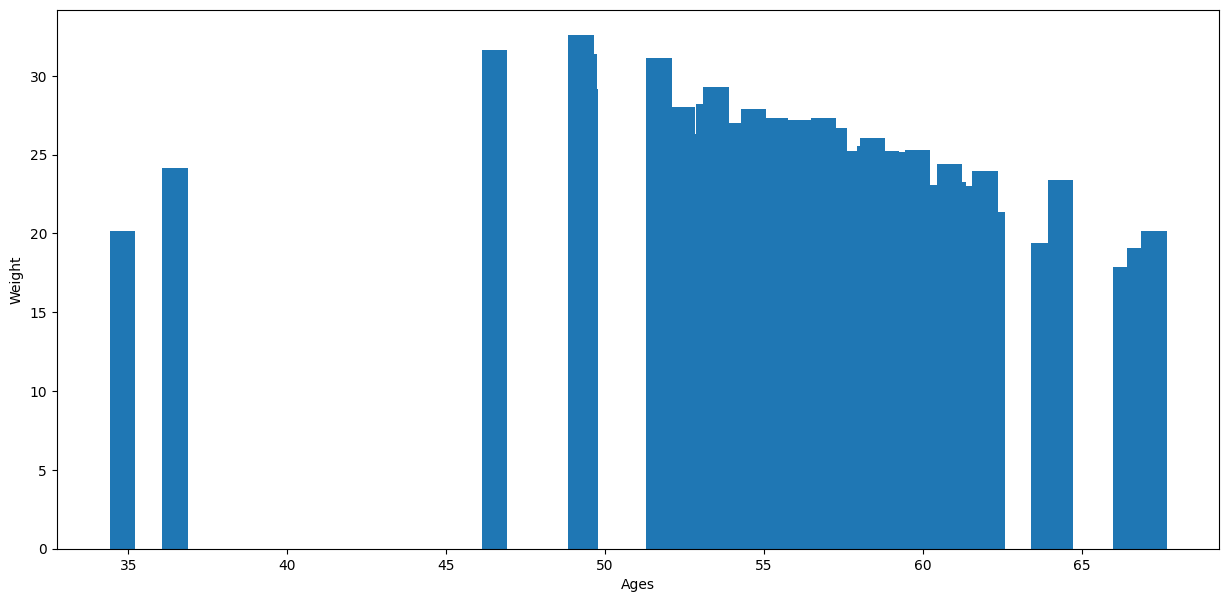

In [53]:
plt.figure(figsize=(15,7))
plt.bar(df['age_at_diagnosis'],df['bmi'])
plt.xlabel('Ages')
plt.ylabel('Weight')


In [54]:
bad_very_bad_df = df[df['ALSFRS_Category'].isin(['Bad', 'Very bad'])]
bad_very_bad_df


,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,Q7,Q8,Q9,Q10,Q11,Q12,total_Q,ALSFRS_Category,AgeGroup,weightGroup
23,829.0,31.0,1631.0,1662.25,40.0,13.333333,11.0,14.640128,0.0,29.0,...,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]","(55.0, 65.0]"
57,863.0,542.0,1631.0,2173.25,339.0,24.666667,0.0,42.723920,0.0,74.0,...,3.0,2.0,1.0,1.0,0.0,2.0,26.0,Bad,"(60, 65]","(55.0, 65.0]"
135,941.0,98.0,1631.0,1729.25,278.0,33.333333,39.0,18.175075,13.0,48.0,...,3.0,1.0,0.0,1.0,0.0,2.0,23.0,Bad,"(60, 65]","(55.0, 65.0]"
168,974.0,7.0,1631.0,1638.25,154.0,9.333333,13.0,8.144528,0.0,15.0,...,3.0,1.0,0.0,1.0,0.0,2.0,24.0,Bad,"(60, 65]","(55.0, 65.0]"
201,1007.0,19.0,1631.0,1650.25,54.0,14.333333,13.0,8.082904,7.0,23.0,...,3.0,1.0,0.0,2.0,0.0,2.0,23.0,Bad,"(60, 65]","(55.0, 65.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,165.0,304.0,1545.0,1864.25,3694.0,786.333333,873.0,607.874165,0.0,1228.0,...,0.0,0.0,0.0,2.0,2.0,3.0,14.0,Very bad,"(55, 60]","(65.0, 75.0]"
13921,213.0,212.0,1631.0,1873.25,4589.0,1133.666667,1300.0,1371.962949,30.0,2521.0,...,1.0,1.0,0.0,4.0,4.0,2.0,28.0,Bad,"(50, 55]","(85.0, 95.0]"
13922,224.0,196.0,1641.0,1867.25,5858.0,1609.000000,1783.0,1989.967588,0.0,3798.0,...,1.0,1.0,0.0,4.0,4.0,4.0,29.0,Bad,"(50, 55]","(85.0, 95.0]"
13924,501.0,96.0,1480.0,1601.25,1477.0,171.666667,234.0,189.362967,0.0,266.0,...,2.0,1.0,1.0,2.0,4.0,4.0,28.0,Bad,"(55, 60]","(45.0, 55.0]"


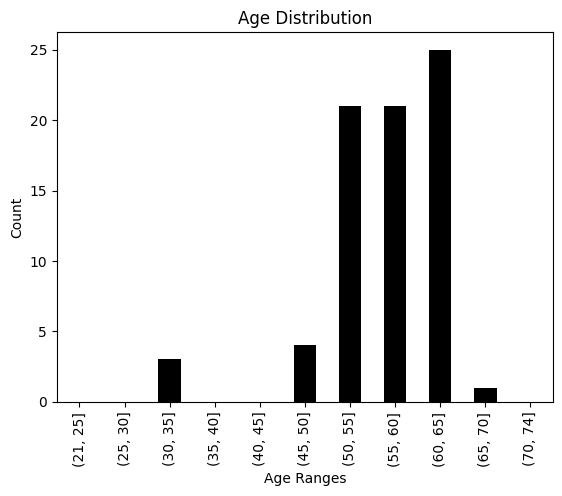

In [55]:
bins = [21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]
bad_very_bad_df['AgeGroup'] = pd.cut(bad_very_bad_df['age_at_diagnosis'], bins)
age_counts = bad_very_bad_df['AgeGroup'].value_counts().sort_index()
age_counts.plot(kind='bar', color='black')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


Text(0, 0.5, 'BMI')

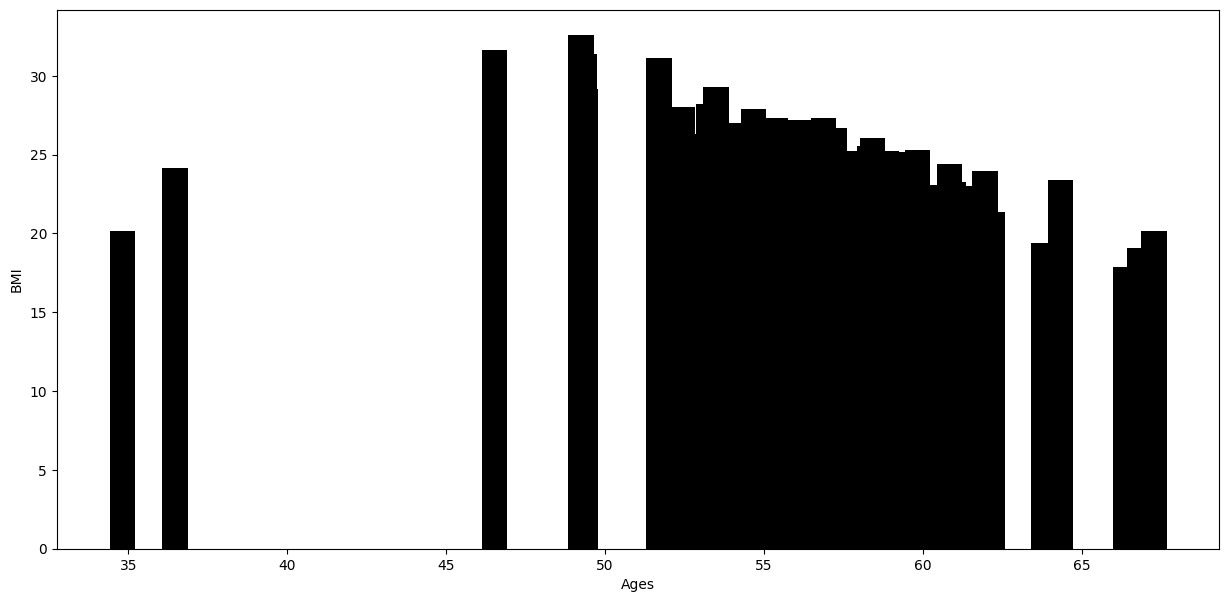

In [58]:
plt.figure(figsize=(15,7))
plt.bar(df['age_at_diagnosis'],df['bmi'],color='black')
plt.xlabel('Ages')
plt.ylabel('BMI')


Text(0, 0.5, 'weight')

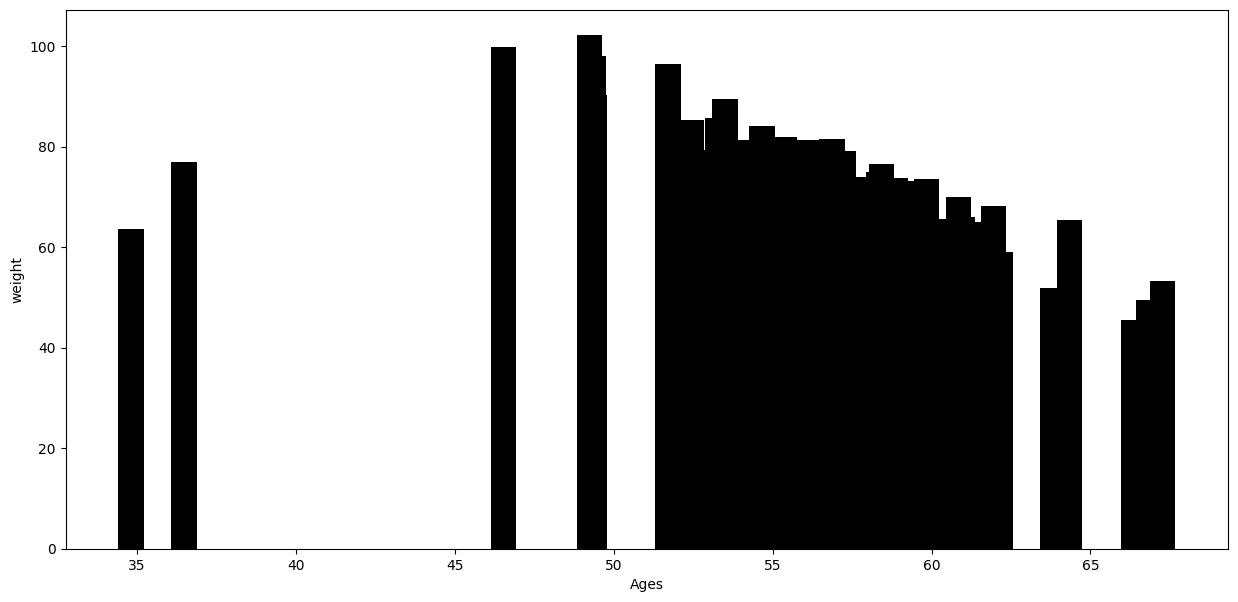

In [59]:
plt.figure(figsize=(15,7))
plt.bar(df['age_at_diagnosis'],df['weight'],color='black')
plt.xlabel('Ages')
plt.ylabel('weight')

In [ ]:
df.